In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')  # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용

# 그래프에서 한글폰트 중 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
train = pd.read_csv('./train.csv', parse_dates=["datetime"]) # ???
train.shape
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [16]:
# train.columns
#train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [22]:
# 기온 피처에 대한 묘사. 
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

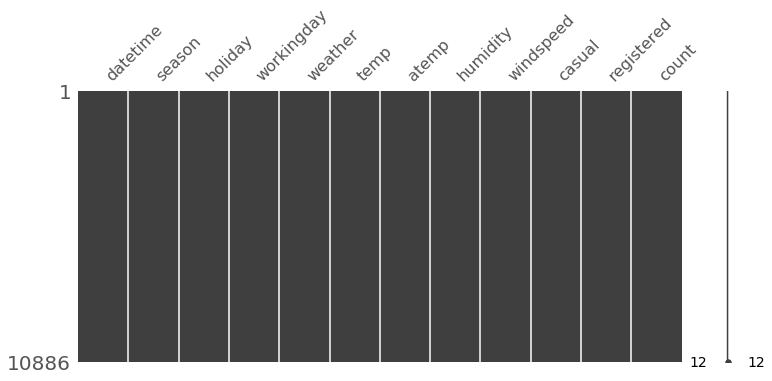

In [25]:
# 널값 확인
train.isnull().sum()

# Null 값 있는지 시각화 해주는 툴
import missingno as msno

msno.matrix(train, figsize=(12,5))

# datetime(시간)을 연,월,일,시간,분,초 로 나누어서 칼럼 재 생성

In [35]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek  # 월화수목금토일 개수 새는 것
train.shape

# 기존 12개 칼럼이 19개로 나누어졌음을 확인

(10886, 19)

In [37]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [38]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

# 행렬과 Alias 이용해 Barplot 그리기

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'rental count per hours')]

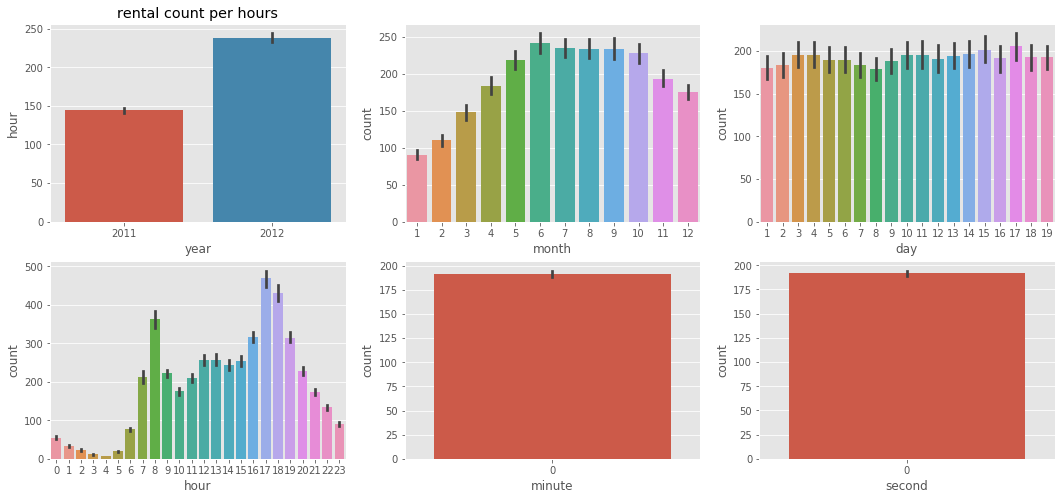

In [30]:
figure, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
# 위의 것은, 차트를 2행 3열로 표시하라는 코드. ax1 ~ ax6는 alias
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='year', title='rental count per years')
ax1.set(ylabel='month', title='rental count per months')
ax1.set(ylabel='day', title='rental count per days')
ax1.set(ylabel='hour', title='rental count per hours')
#ax1.set(ylabel='Count', title='rental count per minuts')
#ax1.set(ylabel='Count', title='rental count per year')

- 연도별 : 2012년이 많다.
- 월별 : 1월 가장 적음. 6월 가장 많음. 7~10월 많음
- 일별 : 1~19일 까지만 있으므로 이 데이터를 피처로 사용하면 안된다. (test셋에 나눠져 있기 때문)
- 시간별 : 출퇴근 시간에 많다. 하지만 주말과 나눠 볼 필요가 있다.
- 분,초 : 모두 0이므로 의미 없다.

# 연도-월 형식으로 붙여서 년도월 별 연속적 count 파악하기. 행렬로 Barplot 그리기.

In [55]:
def concatenate_year_month(datetime) :
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head(100)

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
95,2011-01-05 04:00:00,2011-1
96,2011-01-05 05:00:00,2011-1
97,2011-01-05 06:00:00,2011-1
98,2011-01-05 07:00:00,2011-1


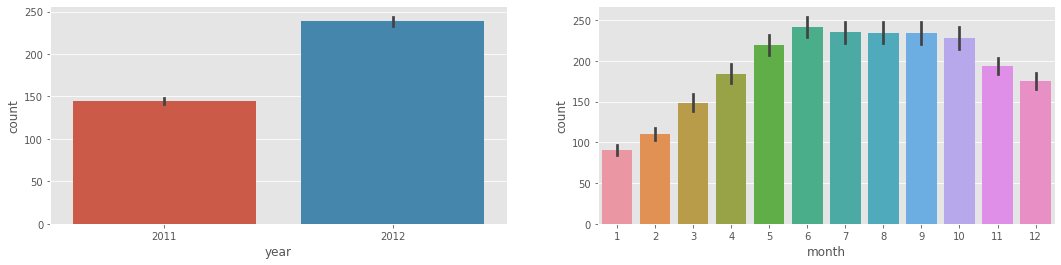

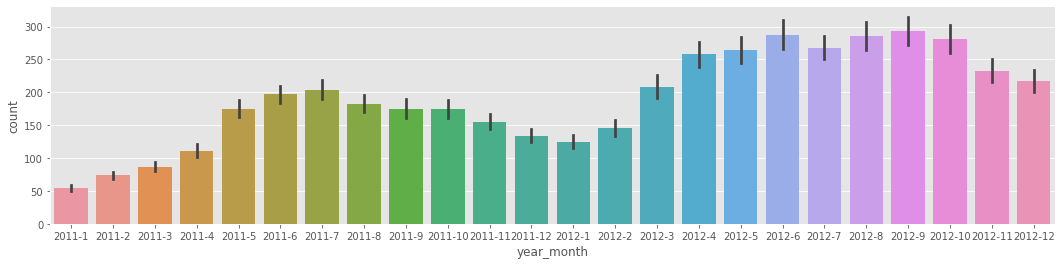

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

- 2012의 대여량 많은 것 확인
- 겨울보다는 여름에 대여량 많음
- 전체적으로 점점 대여량이 증가하는 추세이다.

# 행렬과 Alias 이용해 Boxplot 그리기

[Text(0, 0.5, 'Season'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'rental count per working day')]

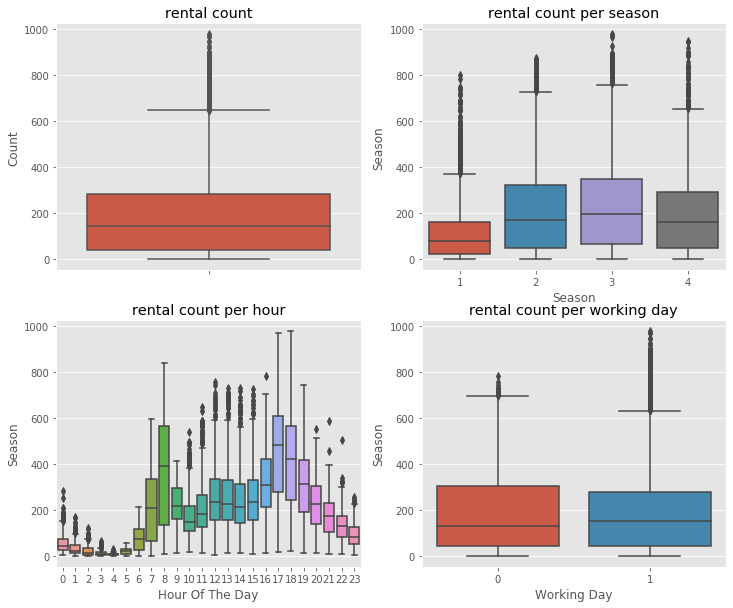

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train, y="count", orient="y", ax=axes[0][0])
sns.boxplot(data=train, y="count", x="season", orient="y", ax=axes[0][1])
sns.boxplot(data=train, y="count", x="hour", orient="y", ax=axes[1][0])
sns.boxplot(data=train, y="count", x="workingday", orient="y", ax=axes[1][1])

axes[0][0].set(ylabel="Count", title="rental count")
axes[0][1].set(xlabel="Season", ylabel="Season", title="rental count per season")
axes[1][0].set(xlabel="Hour Of The Day", ylabel="Season", title="rental count per hour")
axes[1][1].set(xlabel="Working Day", ylabel="Season", title="rental count per working day")

# 행렬과 Alias 이용해 Pointplot 그리기

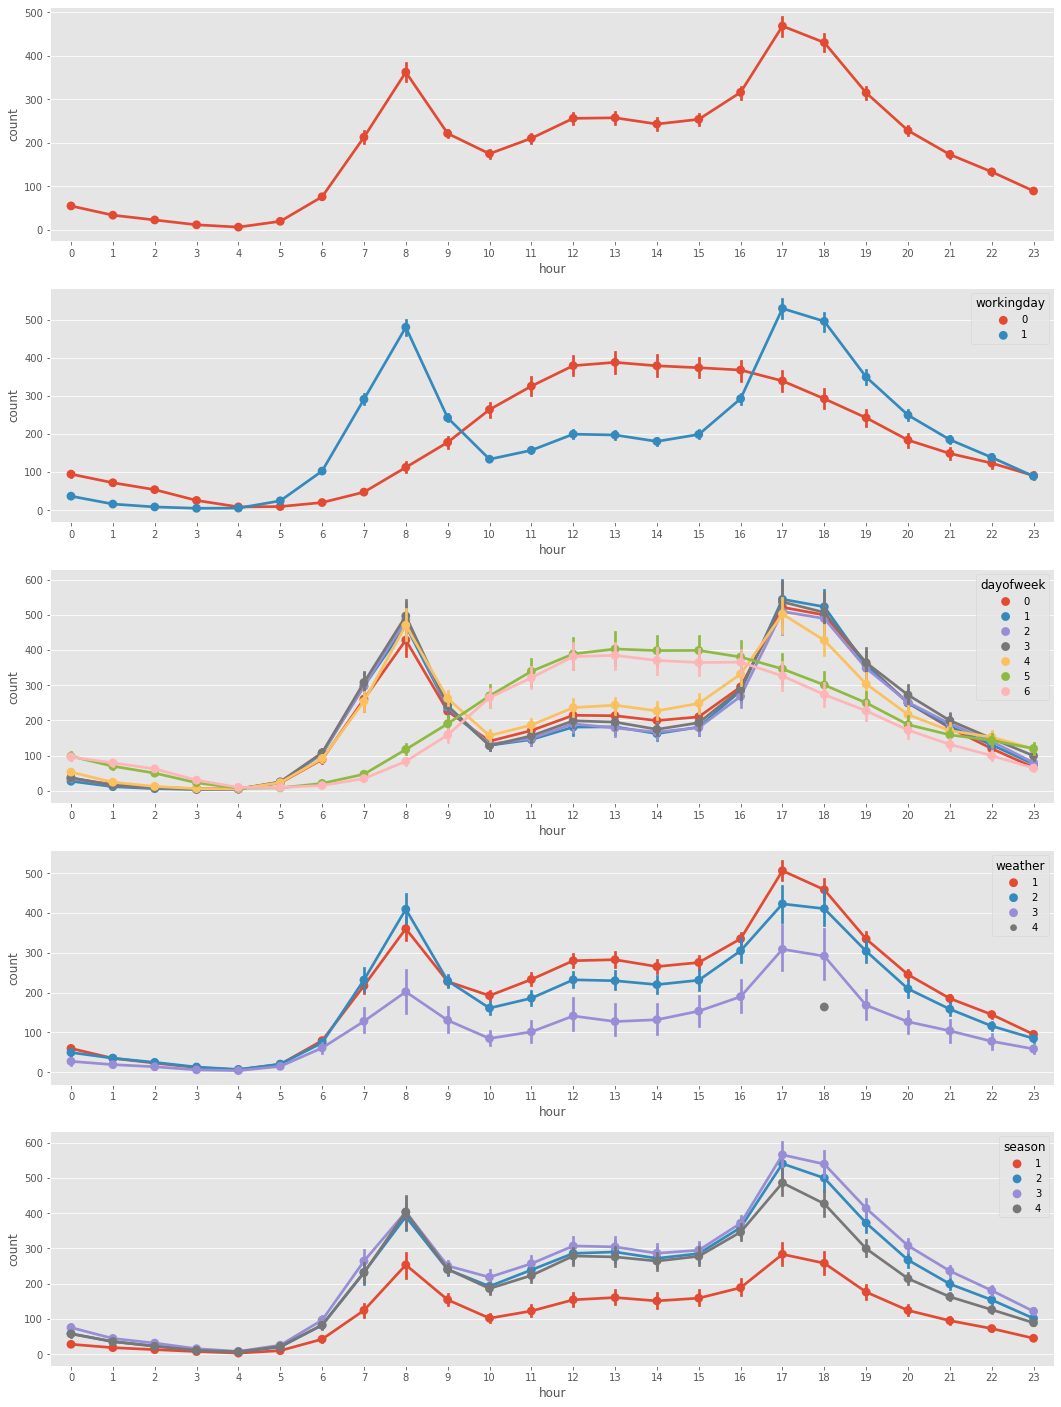

In [39]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1) # 시간 별 수요량
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2) # 시간 별 워킹데이별 수요량
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3) # 시간 별 월화수목금토일 별 수요량
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4) # 시간 별 날씨별 수요량
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5) # 시간 별 계절 별 수요량

# Correlation 사용해 Heatmap 그리기 (기본적으로 존재하던 피처만 이용)

In [41]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


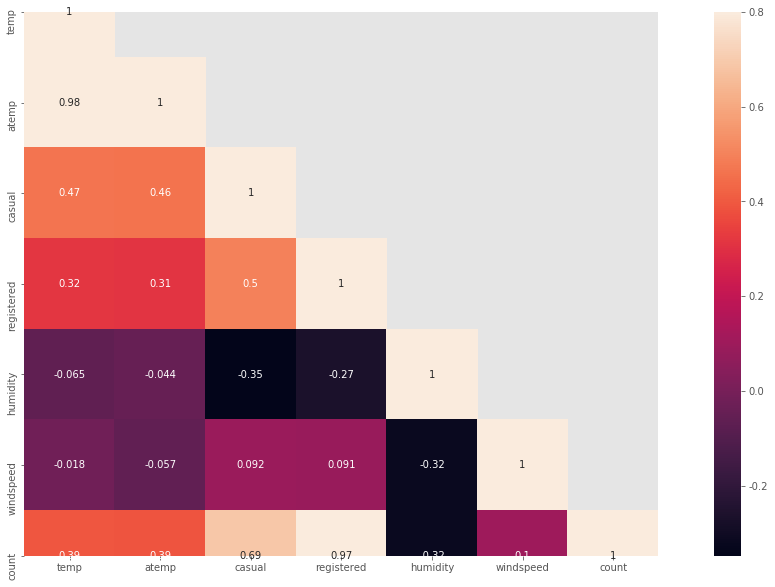

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

# vmax는 어떤 걸 얘기하는 거지?

- 온도, 습도, 풍속은 거의 연관관계가 없다.
- 대여량과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만, test데이터에는 이 값이 없다.
- <B>atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.</B>

# RegPlot(산점도) 그리기

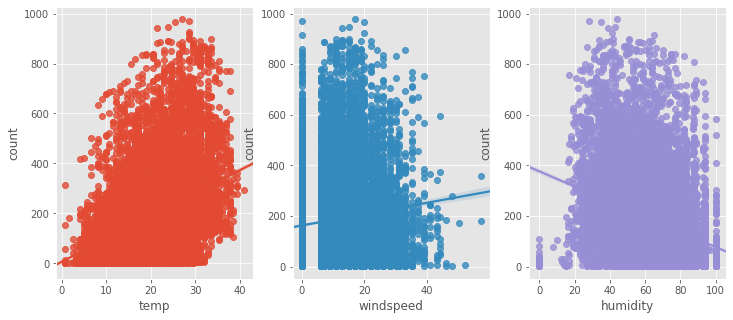

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x = "temp", y="count", data=train, ax=ax1)
sns.regplot(x = "windspeed", y="count", data=train, ax=ax2)
sns.regplot(x = "humidity", y="count", data=train, ax=ax3)

- 풍속의 경우 0에 숫자가 몰려있는 것이 많이 관측됨.
- 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이므로, 이 값을 조정해 Train하면 좀 더 좋은 결과가 나올 것 같다.

# Windspeed를 CountPlot으로 그리기

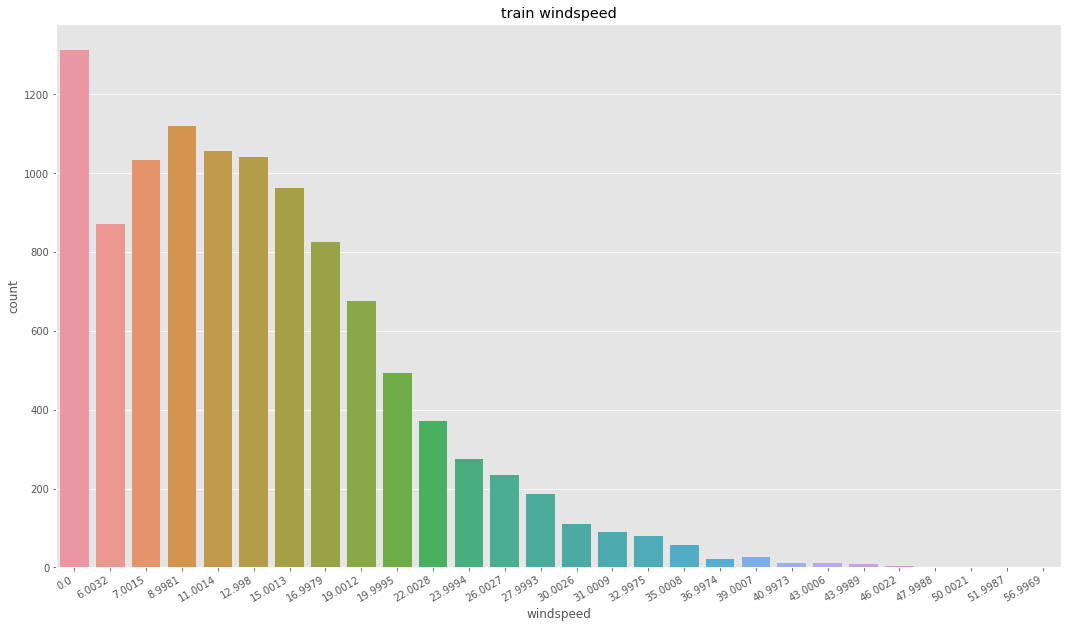

In [13]:
fig, axes = plt.subplots(nrows=1)
fig.set_size_inches(18,10)

plt.sca(axes)
plt.xticks(rotation=30, ha='right')
axes.set(ylabel="count", title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes)



#fig, axes = plt.subplots(nrows=2)
#fig.set_size_inches(18,10)

#plt.sca(axes[0])
#plt.xticks(rotation=30, ha='right')
#axes[0].set(ylabel="count", title="train windspeed")
#sns.countplot(data=train, x="windspeed", ax=axes[0])

#plt.sca(axes[1])
#plt.xticks(rotation=30, ha='right')
#axes[1].set(ylabel="count", title="test windspeed")
#sns.countplot(data=test, x="windspeed", ax=axes[1])

# Outliers를 걷어내기 (주로 앞쪽에 몰려있는 0값..)
# 그리고 DistPlot과 ProbabilityPlot(확률) 나타내기

In [66]:
3*train["count"]

0          48
1         120
2          96
3          39
4           3
         ... 
10881    1008
10882     723
10883     504
10884     387
10885     264
Name: count, Length: 10886, dtype: int64

In [61]:
# trainWithout_Outliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"])]

print(train.shape)                            
print(trainWithoutOutliers.shape)

(10886, 20)
(8001, 20)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668112, 5.319241302387579, 0.9926479860119488))

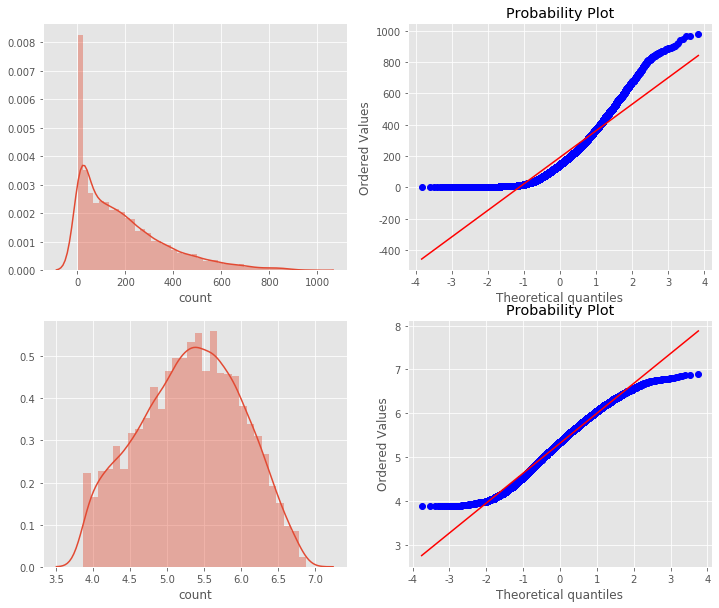

In [69]:
# count값의 데이터 분포도를 파악
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

# 기존 데이터
sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])

# Without Outliers
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

- count 변수가 왼쪽에 치우쳐져 있다.
- 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다.
<B>- 대안으로 Outlier data를 제거하고 count변수에 log를 씌워 변경했다.</B>
 <B>그나마 정규분포 형태로 나타나는 것을 확인.</B>